# Spectral Indices - Image - Notebook

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

import spectral as sp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 30]
plt.rcParams['figure.dpi'] = 600
kwargs = {'linestyle':':'}

%matplotlib inline

## Path

In [3]:
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-Reflectance")
sg_files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-SG-Reflectance")

# Reflectance images
hdr_list = list(files_path.glob('*.hdr'))
bin_list = list(files_path.glob('*.img'))

# Reflectance images w/ Savitzky-Golay filter
sg_hdr_list = list(sg_files_path.glob('*.hdr'))
sg_bin_list = list(sg_files_path.glob('*.img'))

# List of files
targets = list(zip(hdr_list,bin_list))
sg_targets = list(zip(sg_hdr_list, sg_bin_list))

## Data

In [4]:
i = 12
targets[i][1]

WindowsPath('C:/Users/jcmontes/OneDrive - University of Tasmania/01_Projects_Drive/Imaging_spectroscopy/Phenotyping_macroalgae/data/NIWA-Antarctic-CCA/Kestrel-Reflectance/NIWA-CCA_GHN-08_2004-08-06_03-29-13_reflectance.img')

ImageView object:
  Display bands       :  [0, 178.0, 355]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.7933074235916138]
    G: [0.01603286899626255, 0.45337390899658203]
    B: [0.0, 0.7332208752632141]

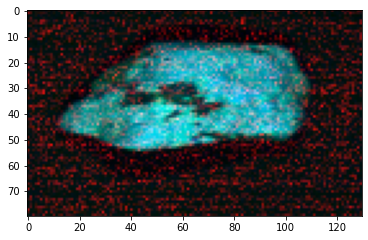

In [5]:
target_open = sp.envi.open(targets[i][0], targets[i][1])
sp.imshow(target_open[180:260,170:300,:])

In [6]:
target_data = target_open.load()

In [7]:
wvl = [float(i) for i in target_open.metadata['wavelength']]

ImageView object:
  Display bands       :  (144, 92, 42)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.01404938567429781, 0.3364647626876831]
    G: [0.010517499409615993, 0.2997487187385559]
    B: [0.0, 0.30249494314193726]

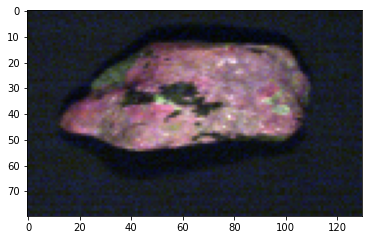

In [8]:
# Cropping region
target_crop = target_data[180:260,170:300,:] # x, y, lambda
#target_crop = target_data[125:240,135:320,:]
sp.imshow(target_crop, (144,92,42))

In [15]:
#print(wvl)

In [12]:
wvl.index(480.65)

51

# Spectral Indices (SI) - Image
---
- NDVI: Modified to match Chl a [A] peak *
- Chlorophyll indices: Modified to match Chl a [A] peak *

### Normalized Differenced Vegetation Index
- NDVI = (R800 - R670) / (R800 + R670)
- NDVI = (R800 - R665) / (R800 + R665)*

800.02 665.67


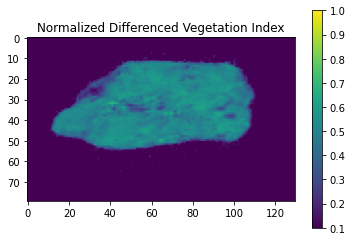

In [150]:
print(wvl[237], wvl[159])
ndvi = (target_crop[:,:,237] - target_crop[:,:,159]) / (target_crop[:,:,237] + target_crop[:,:,159])

plt.imshow(ndvi, vmin=0.1, vmax=1)
plt.title("Normalized Differenced Vegetation Index")
plt.colorbar()

### Plant Senescence Reflectance Index
PSRI = (R678 - R500) / R750

677.72 499.38 750.08


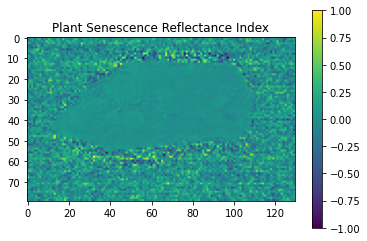

In [122]:
print(wvl[166], wvl[62], wvl[208])

psri = (target_crop[:,:,166] - target_crop[:,:,62]) / (target_crop[:,:,208])

plt.imshow(psri, vmin=-1, vmax=1)
plt.title("Plant Senescence Reflectance Index")
plt.colorbar()

### Photochemical Reflectance Index
PRI = (R531 - R570) / (R531 + R570)

531.8 569.45


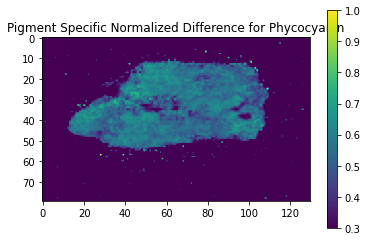

In [129]:
print(wvl[81], wvl[103])

psnd_pc = (target_crop[:,:,81] - target_crop[:,:,103]) / (target_crop[:,:,81] + target_crop[:,:,103])

plt.imshow(psnd_pe, vmin=0.3, vmax=1)
plt.title("Pigment Specific Normalized Difference for Phycocyanin")
plt.colorbar()

### Enhanced Vegetation Index
- EVI = (2.5 * (R800 - R670)) / (1 + R800 + (6 * R670) - (7.5 * R480))

800.02 670.84 480.65


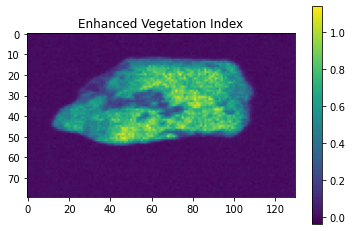

In [14]:
print(wvl[237], wvl[162], wvl[51])

evi = (2.5 * (target_crop[:,:,237] - target_crop[:,:,162])) / (1 + target_crop[:,:,237] + (6 * target_crop[:,:,162]) - (7.5 * target_crop[:,:,51]))

plt.imshow(evi)
plt.title("Enhanced Vegetation Index")
plt.colorbar()

## Chlorophyll indices
---

### Modified Chlorophyll Absorption Reflectance Index
- MCARI = ((R700 - R670) - 0.2 * (R700 - R550)) * (R700 / R670)
- MCARI = ((R700 - R665) - 0.2 * (R700 - R550)) * (R700 / R665) *

Modified peaks of Chl absorbance *

700.12 665.67 550.61


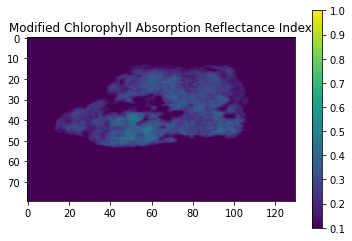

In [158]:
print(wvl[179], wvl[159], wvl[92])

mcari = ((target_crop[:,:,179] - target_crop[:,:,159]) - 0.2 * (target_crop[:,:,179] - target_crop[:,:,92])) * (target_crop[:,:,179] / target_crop[:,:,159])

plt.imshow(mcari, vmin=0.1, vmax=1)
plt.title("Modified Chlorophyll Absorption Reflectance Index")
plt.colorbar()

### Pigment Specific Normalized Difference for Chlorophyll a
- PSND_CHLA = (R800 - R680) / (R800 + R680)
- PSND_CHLA = (R800 - R665) / (R800 + R665) *

800.02 665.67


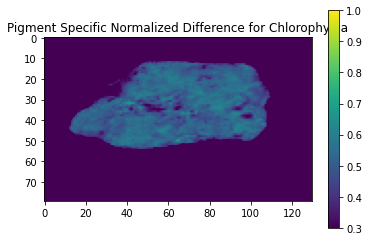

In [152]:
print(wvl[237], wvl[159])

psnd_chla = (target_crop[:,:,237] - target_crop[:,:,159]) / (target_crop[:,:,237] + target_crop[:,:,159])

plt.imshow(psnd_chla, vmin=0.3, vmax=1)
plt.title("Pigment Specific Normalized Difference for Chlorophyll a")
plt.colorbar()

### Pigment Specific Normalized Difference for Chlorophyll b
- PSND_CHLB = (R800 - R635) / (R800 + R635)

Could modify to [A] peak of Chl extract at 624 nm

800.02 634.7


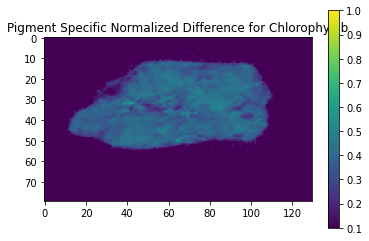

In [125]:
print(wvl[237], wvl[141])

psnd_chlb = (target_crop[:,:,237] - target_crop[:,:,141]) / (target_crop[:,:,237] + target_crop[:,:,141])

plt.imshow(psnd_chlb, vmin=0.1, vmax=1)
plt.title("Pigment Specific Normalized Difference for Chlorophyll b")
plt.colorbar()

### Pigment Specific Simple Ratio for Chlorophyll a
- PSSR_CHLA = R800 / R680
- PSSR_CHLA = R800 / R665 *

800.02 665.67


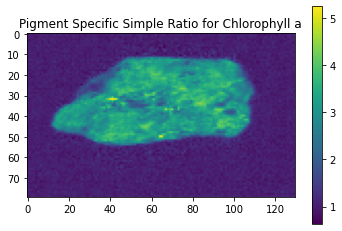

In [155]:
print(wvl[237], wvl[159])

pssr_chla = target_crop[:,:,237] / target_crop[:,:,159]

plt.imshow(pssr_chla)
plt.title("Pigment Specific Simple Ratio for Chlorophyll a")
plt.colorbar()

### Pigment Specific Simple Ratio for Chlorophyll b
- PSSR_CHLB = R800 / R635

Could modify to [A] peak of Chl extract at 624 nm

800.02 634.7


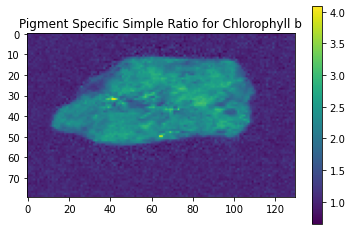

In [135]:
print(wvl[237], wvl[141])

pssr_chlb = target_crop[:,:,237] / target_crop[:,:,141]

plt.imshow(pssr_chlb)
plt.title("Pigment Specific Simple Ratio for Chlorophyll b")
plt.colorbar()

## Phycobilin indices
---
- We based the following SI based on the [A] peaks of phycobilin extractions

### Pigment Specific Normalized Difference for Phycobilin 494 nm
- PSND_PB494 = (R800 - R494) / (R800 + R494)

800.02 494.27


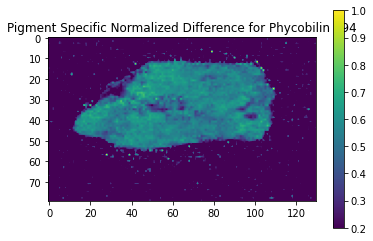

In [159]:
print(wvl[237], wvl[59])

psnd_pb494 = (target_crop[:,:,237] - target_crop[:,:,59]) / (target_crop[:,:,237] + target_crop[:,:,59])

plt.imshow(psnd_pb494, vmin=0.2, vmax=1)
plt.title("Pigment Specific Normalized Difference for Phycobilin 494")
plt.colorbar()

### Pigment Specific Simple Ratio for Phycobilin 494 nm
- PSSR_PB494 = R800 / R494

800.02 494.27


C:\Users\jcmontes\AppData\Local\Temp\ipykernel_5460\3379486117.py:3: RuntimeWarning: divide by zero encountered in true_divide
  pssr_pb494 = target_crop[:,:,237] / target_crop[:,:,59]


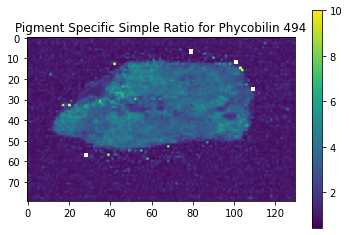

In [161]:
print(wvl[237], wvl[59])

pssr_pb494 = target_crop[:,:,237] / target_crop[:,:,59]

plt.imshow(pssr_pb494, vmax=10)
plt.title("Pigment Specific Simple Ratio for Phycobilin 494")
plt.colorbar()

### Pigment Specific Normalized Difference for Phycoerythrin
- PSND_PE = (R800 - R563) / (R800 + R563)
- Based on Beer & Eshel equation and our [A] peaks

800.02 562.6


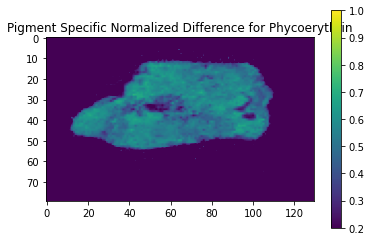

In [162]:
print(wvl[237], wvl[99])

psnd_pe = (target_crop[:,:,237] - target_crop[:,:,99]) / (target_crop[:,:,237] + target_crop[:,:,99])

plt.imshow(psnd_pe, vmin=0.2, vmax=1)
plt.title("Pigment Specific Normalized Difference for Phycoerythrin")
plt.colorbar()

### Pigment Specific Simple Ratio for Phycoerythrin
- PSSR_PE = R800 / R563

800.02 562.6


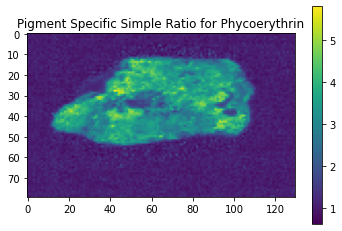

In [163]:
print(wvl[237], wvl[99])

pssr_pe = target_crop[:,:,237] / target_crop[:,:,99]

plt.imshow(pssr_pe)
plt.title("Pigment Specific Simple Ratio for Phycoerythrin")
plt.colorbar()

### Pigment Specific Normalized Difference for Phycocyanin
- PSND_PC = (R800 - R618) / (R800 + R618)
- Based on Beer & Eshel equation
- No peak detected in our [A] phycobilin extractions

800.02 617.51


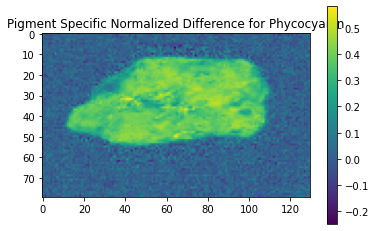

In [166]:
print(wvl[237], wvl[131])

psnd_pc = (target_crop[:,:,237] - target_crop[:,:,131]) / (target_crop[:,:,237] + target_crop[:,:,131])

plt.imshow(psnd_pc)
plt.title("Pigment Specific Normalized Difference for Phycocyanin")
plt.colorbar()

### Pigment Specific Simple Ratio for Phycocyanin
- PSSR_PE = R800 / R618

800.02 617.51


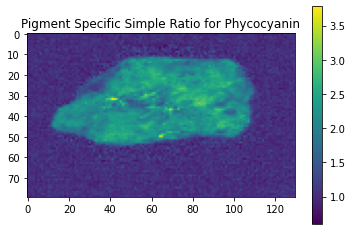

In [167]:
print(wvl[237], wvl[131])

pssr_pe = target_crop[:,:,237] / target_crop[:,:,131]

plt.imshow(pssr_pe)
plt.title("Pigment Specific Simple Ratio for Phycocyanin")
plt.colorbar()

### Pigment Specific Normalized Difference for Allophycocyanin (?)
- PSND_APC = (R800 - R652) / (R800 + R652)
- Possibly not reliable as overlaps with Chl [A] extract peak 655 nm
- Tadmor-Shalev et al.

800.02 651.9


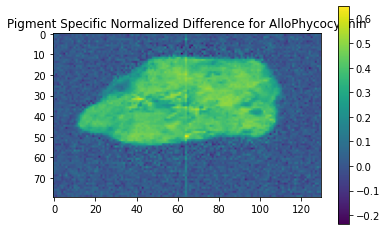

In [170]:
print(wvl[237], wvl[151])

psnd_apc = (target_crop[:,:,237] - target_crop[:,:,151]) / (target_crop[:,:,237] + target_crop[:,:,151])

plt.imshow(psnd_apc)
plt.title("Pigment Specific Normalized Difference for AlloPhycocyanin")
plt.colorbar()

### Pigment Specific Simple Ratio for Allophycocyanin
- PSSR_APC = R800 / R652

800.02 651.9


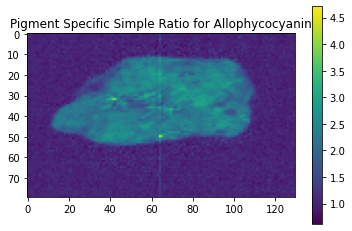

In [171]:
print(wvl[237], wvl[151])

pssr_apc = target_crop[:,:,237] / target_crop[:,:,151]

plt.imshow(pssr_apc)
plt.title("Pigment Specific Simple Ratio for Allophycocyanin")
plt.colorbar()